# Fisher's Linear Discriminant Analysis (LDA)
## Seminar: Hands- on BCI implementation


### Basic definition
$ X = (x_{1},x_{2},...,x_{N})^{T}$

$ Y = \begin{pmatrix} y_{1}\\ y_{2}\\ \vdots\\y_{N}\end{pmatrix}$

$ \{x_{i},y_{i}\}^{N}_{i = 1},   
\quad x_{i}\in{\mathbb{R}}^{N},   
\quad y_{i}\in\{+1,-1\}$

$ x_{C1} = \{x_{i}\mid y_{i}=+1\},\\
x_{C2} = \{x_{i}\mid y_{i}=-1\} $

$\Vert x_{C1} \Vert = N_{1}, \quad \Vert x_{C2} \Vert = N_{2}, \quad N = N_{1}+N_{2}$

## Mathematical Background
$ z_{i} = W^{T}\cdot x_{i}$

$ \bar{z} = \frac{1}{N}\cdot \sum_{i=1}^N z_{i} = \frac{1}{N}\cdot \sum_{i=1}^N W^{T}\cdot x_{i}$

$ S_{z} = \frac{1}{N}\cdot \sum_{i=1}^N (z_{i}-\bar{z})\cdot (z_{i}-\bar{z})^{T} $

Claster 1: 

$ \bar{z_{1}} = \frac{1}{N_{1}}\cdot \sum_{i=1}^{N_{1}} W^{T}\cdot x_{i}$

$ S_{1} = \frac{1}{N_{1}}\cdot \sum_{i=1}^{N_{1}} (z_{i}-\bar{z_{1}})\cdot (z_{i}-\bar{z_{1}})^{T} $

we can do some transformation to $S_{1}$

$S_{1}= \frac{1}{N_{1}}\sum_{i=1}^{N_{1}} (w^{T}x_{i}-\frac{1}{N_{1}}\sum_{j=1}^{N_{1}} w^{T}x_{j})\cdot(w^{T}x_{i}-\frac{1}{N_{1}}\sum_{j=1}^{N_{1}} w^{T}x_{j})^{T}$

$\quad = \frac{1}{N_{1}}\sum_{i=1}^{N_{1}}w^{T}\cdot(x_{i}-\bar{x_{c1}})(x_{i}-\bar{x_{c1}})^{T}\cdot w $

$\quad = w^{T} [\frac{1}{N_{1}}\sum_{i=1}^{N_{1}}(x_{i}-\bar{x_{c1}})(x_{i}-\bar{x_{c1}})^{T}]w$

$S_{c1}= \frac{1}{N_{1}}\sum_{i=1}^{N_{1}}(x_{i}-\bar{x_{c1}})(x_{i}-\bar{x_{c1}})^{T}$

## Basic Algorithsm 
within class min

between class max



We define our target funciton: 

$ J(W) = \frac{(\bar{z_{1}}-\bar{z_{2}})^2}{S_{1}+S_{2}} = \frac{f(x)^2}{g(x)}$

$ \hat{w} = argmax_{w}J(w)$ 

$ \Rightarrow f(x) = \frac{1}{N_{1}}\Sigma w^{T} x_{i}-\frac{1}{N_{2}}\Sigma w^{T} x_{i} \\
\quad\quad\quad = w^{T}(\frac{1}{N_{1}}\Sigma x_{i}-\frac{1}{N_{2}}\Sigma x_{i})\\
\quad\quad\quad =w^{T}(\bar{x_{c1}}-\bar{x_{c2}})$

$ \quad g(x)= w^{T}(S_{c1}+S_{c2})w $

$\Rightarrow J(w)=\frac{f(x)^2}{g(x)}=\frac{w^{T}(\bar{x_{c1}}-\bar{x_{c2}})(\bar{x_{c1}}-\bar{x_{c2}})^{T}w}{w^{T}(S_{c1}+S_{c2})w}=\frac{w^{T}S_{w}w}{w^{T}S_{b}w}$

$\frac{\partial{J(w)}}{\partial{w}}= 2S_{b}w\cdot(w^{T}S_{w}w)^{-1}+(w^{T}S_{b}w)\cdot(-1)(w^{T}S_{w}w)^{-2}\cdot2S_{w}w$

let the differentiation equal zero, where the $J(w)$ reaches maximum, 

then we have  $S_{b}W\cdot(w^{T}S_{w}w)^{-1}=(w^{T}S_{b}w)\cdot(w^{T}S_{w}w)^{-2}\cdot S_{w}w$

$S_{b}w = S_{w}w\cdot\frac{w^{T}S_{b}w}{w^{T}S_{w}w}$

$ w \propto S_{w}^{-1}S_{b}w$

where $S_{b}w = (\bar{x_{c1}}-\bar{x_{c2}})(\bar{x_{c1}}-\bar{x_{c2}})^{T}w$

actually, $((\bar{x_{c1}}-\bar{x_{c2}})^{T}\cdot w) $ is a scalar factor

thus, $w \propto S_{w}^{-1}(\bar{x_{c1}}-\bar{x_{c2}})$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from scipy.stats import norm

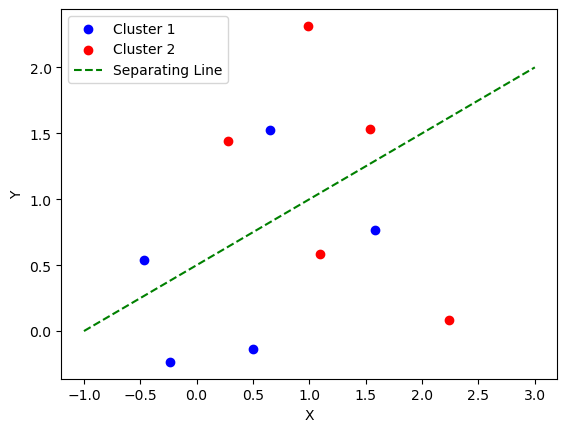

In [4]:
# Generate data for two clusters
np.random.seed(42)
cluster1 = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0], [0, 1]], size=5)
cluster2 = np.random.multivariate_normal(mean=[2, 2], cov=[[1, 0], [0, 1]], size=5)

# Plot the data points
plt.scatter(cluster1[:, 0], cluster1[:, 1], c='b', label='Cluster 1')
plt.scatter(cluster2[:, 0], cluster2[:, 1], c='r', label='Cluster 2')

# Manually define a line to separate the clusters
x_line = np.array([-1, 3])
y_line = 0.5 * x_line + 0.5

# Plot the separating line
plt.plot(x_line, y_line, 'g--', label='Separating Line')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

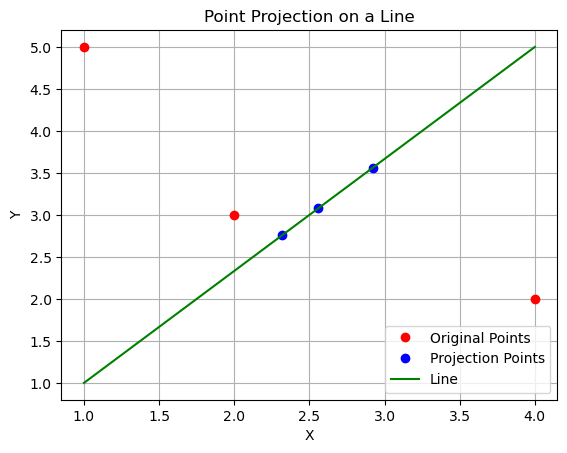

In [3]:
# Define the point and line coordinates
point = np.array([[2, 3], [4, 2], [1, 5]])  # Multiple points
line_point1 = np.array([1, 1])
line_point2 = np.array([4, 5])

# Calculate the line vector AB
line_vector = line_point2 - line_point1

# Initialize a list to store the projection points
projection_points = []

# Iterate over each point and calculate the projection
for i in range(len(point)):
    # Calculate the vector from A to P
    ap = point[i] - line_point1

    # Calculate the scalar projection of AP onto AB
    scalar_projection = np.dot(ap, line_vector) / np.dot(line_vector, line_vector)

    # Calculate the projection point Q
    projection_point = line_point1 + scalar_projection * line_vector

    # Add the projection point to the list
    projection_points.append(projection_point)

# Convert the projection points to a numpy array
projection_points = np.array(projection_points)

# Plot the original points and the projection points
plt.plot(point[:, 0], point[:, 1], 'ro', label='Original Points')
plt.plot(projection_points[:, 0], projection_points[:, 1], 'bo', label='Projection Points')
plt.plot([line_point1[0], line_point2[0]], [line_point1[1], line_point2[1]], 'g-', label='Line')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Point Projection on a Line')
plt.legend()
plt.grid(True)
plt.show()


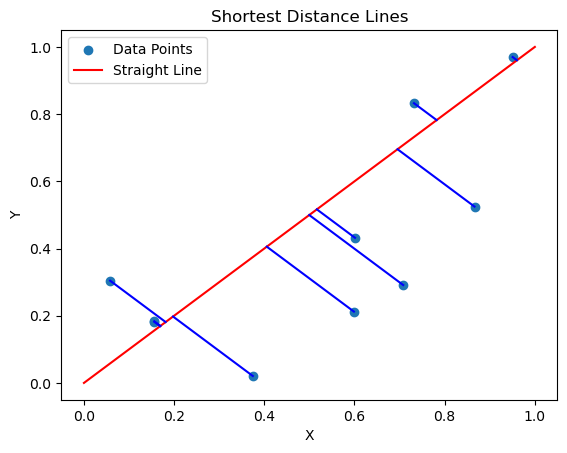

In [17]:
# Generate random scatter plot data
np.random.seed(42)
x = np.random.rand(10)
y = np.random.rand(10)

# Define line coordinates
line_x = np.array([0, 1])  # x-coordinates for the line
line_y = np.array([0, 1])  # y-coordinates for the line

# Create scatter plot
plt.figure()
plt.scatter(x, y, label='Data Points')

# Plot the straight line
plt.plot(line_x, line_y, color='red', label='Straight Line')

# Calculate and plot the shortest distance lines
for i in range(len(x)):
    # Calculate the projection point on the line
    point = np.array([x[i], y[i]])
    line_vector = np.array([line_x[1] - line_x[0], line_y[1] - line_y[0]])
    projection = np.dot(point, line_vector) / np.dot(line_vector, line_vector) * line_vector

    # Plot the shortest distance line segment
    plt.plot([point[0], projection[0]], [point[1], projection[1]], color='blue')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Shortest Distance Lines')
plt.legend()

# Show the plot
plt.show()


In [12]:
# Generate samples for two classes
np.random.seed(0)
class1 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], 30)
class2 = np.random.multivariate_normal([3, 6], [[1, 0], [0, 1]], 30)

# Function to update and plot the line
def update_line(slope):
    intercept = -0
    x = np.linspace(-10, 10, 100)
    y = slope * x + intercept
    
    # Calculate two points on the line
    x1 = 0
    y1 = slope * x1 + intercept
    x2 = 1
    y2 = slope * x2 + intercept
    # Calculate the line vector
    line_point1 = np.array([x1, y1])
    line_point2 = np.array([x2, y2])
    line_vector = np.array([x2 - x1, y2 - y1])
    
    # Calculate the class means
    mean_class1 = np.mean(class1, axis=0)
    mean_class2 = np.mean(class2, axis=0)
    # Calculate the scalar projections of class samples onto the line
    scalar_projections_class1 = np.dot(class1 - mean_class1, line_vector) / np.dot(line_vector, line_vector)
    scalar_projections_class2 = np.dot(class2 - mean_class1, line_vector) / np.dot(line_vector, line_vector)
    
    # Calculate the slope of the decision boundary
    perpendicular_slope = -1/slope
    perpendicular_intercept = 3
    perpendicular_x_vals = np.linspace(-5, 6, 4)
    perpendicular_y_vals = perpendicular_slope * perpendicular_x_vals + perpendicular_intercept
    
    # Initialize lists to store the projection points for each class
    projection_points_class1 = []
    projection_points_class2 = []
    
    # Iterate over each point in class 1 and calculate the projection
    for i in range(len(class1)):
        # Calculate the vector from A to P
        ap = class1[i] - line_point1
        # Calculate the scalar projection of AP onto AB
        scalar_projection = np.dot(ap, line_vector) / np.dot(line_vector, line_vector)
        # Calculate the projection point Q
        projection_point = line_point1 + scalar_projection * line_vector
        # Add the projection point to the list
        projection_points_class1.append(projection_point)
    
    # Iterate over each point in class 2 and calculate the projection
    for i in range(len(class2)):
        # Calculate the vector from A to P
        ap = class2[i] - line_point1
        # Calculate the scalar projection of AP onto AB
        scalar_projection = np.dot(ap, line_vector) / np.dot(line_vector, line_vector)
        # Calculate the projection point Q
        projection_point = line_point1 + scalar_projection * line_vector
        # Add the projection point to the list
        projection_points_class2.append(projection_point)
    
    # Convert the projection points to numpy arrays
    projection_points_class1 = np.array(projection_points_class1)
    projection_points_class2 = np.array(projection_points_class2)

    plt.figure()
    # Plot the original points and the projection points for class 1
    plt.plot(class1[:, 0], class1[:, 1], 'rx', label='Class 1 Points')
    plt.plot(projection_points_class1[:, 0], projection_points_class1[:, 1], 'ro', label='Class 1 Projection Points')
    # Plot the original points and the projection points for class 2
    plt.plot(class2[:, 0], class2[:, 1], 'bx', label='Class 2 Points')
    plt.plot(projection_points_class2[:, 0], projection_points_class2[:, 1], 'bo', label='Class 2 Projection Points')
    

    plt.plot(x, y, 'k-', label='Projection line')
    plt.plot(perpendicular_x_vals, perpendicular_y_vals, 'r--', label='Decision Boundary')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Line with Slope = {}'.format(slope))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.axis('equal')
    plt.xlim(-5, 10)  # Fix x-axis scale
    plt.ylim(-5, 10)  # Fix y-axis scale
    plt.show()
    
    # Draw histograms of the projections for each class
    plt.figure()
    plt.hist(scalar_projections_class1, bins=20, density=True, color='red', alpha=0.5, label='Class 1')
    plt.hist(scalar_projections_class2, bins=20, density=True, color='blue', alpha=0.5, label='Class 2')
    xc1 = np.linspace(np.min(scalar_projections_class1), np.max(scalar_projections_class1), 100)
    yc1 = norm.pdf(xc1, np.mean(scalar_projections_class1), np.std(scalar_projections_class1))
    plt.plot(xc1, yc1, 'r-', label='Projection Distribution of class1')
    xc2 = np.linspace(np.min(scalar_projections_class2), np.max(scalar_projections_class2), 100)
    yc2 = norm.pdf(xc2, np.mean(scalar_projections_class2), np.std(scalar_projections_class2))
    plt.plot(xc2, yc2, 'b-', label='Projection Distribution of class2')
    
    plt.xlabel('Projection Value')
    plt.ylabel('Density')
    plt.title('Distribution of Projections on the Line')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)

    plt.show()


# Create the interactive slider
interact(update_line, slope=(-10,-0.5, 0.5))


interactive(children=(FloatSlider(value=-5.5, description='slope', max=-0.5, min=-10.0, step=0.5), Output()), …

<function __main__.update_line(slope)>

NameError: name 'x_vals' is not defined

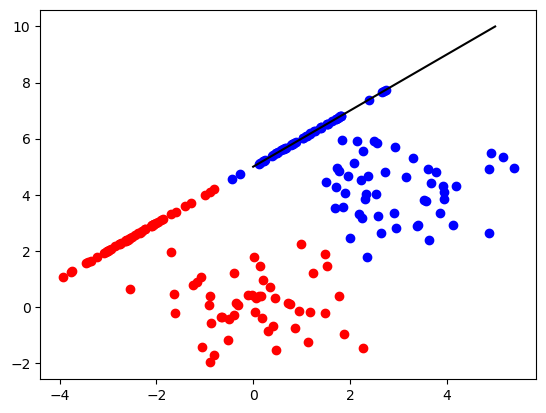

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define the line coordinates
line_point1 = np.array([0, 5])
line_point2 = np.array([5, 10])

# Generate samples for two classes
np.random.seed(0)
class1 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], 50)
class2 = np.random.multivariate_normal([3, 4], [[1, 0], [0, 1]], 50)

# Calculate the line vector AB
line_vector = line_point2 - line_point1

# Initialize lists to store the projection points for each class
projection_points_class1 = []
projection_points_class2 = []

# Iterate over each point in class 1 and calculate the projection
for i in range(len(class1)):
    # Calculate the vector from A to P
    ap = class1[i] - line_point1

    # Calculate the scalar projection of AP onto AB
    scalar_projection = np.dot(ap, line_vector) / np.dot(line_vector, line_vector)

    # Calculate the projection point Q
    projection_point = line_point1 + scalar_projection * line_vector

    # Add the projection point to the list
    projection_points_class1.append(projection_point)

# Iterate over each point in class 2 and calculate the projection
for i in range(len(class2)):
    # Calculate the vector from A to P
    ap = class2[i] - line_point1

    # Calculate the scalar projection of AP onto AB
    scalar_projection = np.dot(ap, line_vector) / np.dot(line_vector, line_vector)

    # Calculate the projection point Q
    projection_point = line_point1 + scalar_projection * line_vector

    # Add the projection point to the list
    projection_points_class2.append(projection_point)

# Convert the projection points to numpy arrays
projection_points_class1 = np.array(projection_points_class1)
projection_points_class2 = np.array(projection_points_class2)

# Plot the original points and the projection points for class 1
plt.plot(class1[:, 0], class1[:, 1], 'ro', label='Class 1 Points')
plt.plot(projection_points_class1[:, 0], projection_points_class1[:, 1], 'ro', label='Class 1 Projection Points')

# Plot the original points and the projection points for class 2
plt.plot(class2[:, 0], class2[:, 1], 'bo', label='Class 2 Points')
plt.plot(projection_points_class2[:, 0], projection_points_class2[:, 1], 'bo', label='Class 2 Projection Points')

# Plot the line
plt.plot([line_point1[0], line_point2[0]], [line_point1[1], line_point2[1]], 'k-', label='Line')
plt.plot(x_vals, y_vals, 'k-', label='Decision Boundary')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Point Projection on a Line')

plt.legend()
plt.grid(True)
plt.axis('equal')

plt.show()


In [13]:
# Function to update and plot the line
def update_line(slope):
    x = np.linspace(-10, 10, 100)
    y = slope * x

    plt.figure()
    plt.plot(x, y, 'r-', label='Line')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Line with Slope = {}'.format(slope))
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.xlim(-10, 10)  # Fix x-axis scale
    plt.ylim(-10, 10)  # Fix y-axis scale
    plt.show()

# Create the interactive slider
interact(update_line, slope=(-5.0, 5.0, 0.1))


interactive(children=(FloatSlider(value=0.0, description='slope', max=5.0, min=-5.0), Output()), _dom_classes=…

<function __main__.update_line(slope)>